# Compte rendu  TP2 :Interpolation Numérique 
### Ichrak Ben Saad 
#### 2DNI-G2

### Interpolation polynomiale:

##### Définition:

l'interpolation polynomiale est une technique d'interpolation d'un ensemble de données ou d'une fonction par un polynôme. En d'autres termes, étant donné un ensemble de points (obtenu, par exemple, à la suite d'une expérience), on cherche **un polynôme** qui passe par tous ces points, et éventuellement vérifie d'autres conditions, de degré si possible le plus bas.

### Polynôme d'interpolation de Lagrange:

#### Exercice 1:

 
Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :$$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

1) Que renvoie la fonction PR lorsqu'on lui déclare x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n)) et y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n)) deux vecteurs de même longueur n et c un nombre réel donné.


In [2]:
from numpy import prod

def PR(x,y,c):
   S = [] 
   n = len(x)
    
   for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
   return  sum(S)

In [3]:
X=[1, 2, 3, 4]
Y=[-1, 0, 2, 1]
for i in X:
  print(PR(X,Y,i))

-1.0
0.0
2.0
1.0


2)Que contient le vecteur LL après la fin de la boucle kk

In [4]:
x=[1, 2, 3, 4]
y=[-1, 0, 2, 1]

In [9]:
S = [] 
n = len(x)
for c in (X):
    
  for j in range(n):
      L =[c-xx for xx in x]
      for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
      S.append(y[j]*prod(L))
        
print (sum(S))

2.0


In [10]:
L

[1.0, 1.0, 1.0, 1]

3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

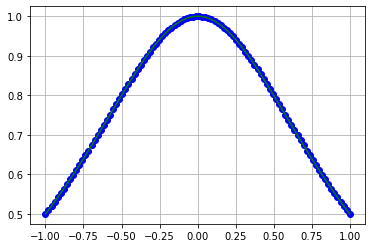

In [26]:
import matplotlib.pyplot as plt
from numpy import linspace
import numpy as np 

x=[-1, 0.1, 1]
x=np.linspace(-1,1,100) 
f = lambda x: 1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100) 
pt=[]
for u in t:
    pt.append(PR(x,y,u))
#représentation graphique 
plt.plot(t,pt,'r',x,y,'bo',t,f(t),'g')
plt.grid(True)
plt.show()

=>Les polynomes de Lagrange forment une base, on en déduit que tout polynome de degré n s’écrit comme combinaison linéaire des Li.

4) On considère la fonction $F$ suivante :$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.
4.1) Représenter sur un même graphe la fonction  et 
, où 
 est le polynôme d'interpolation de Lagrange de  aux points 


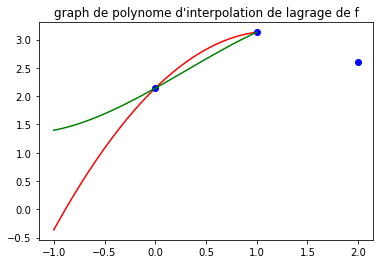

In [28]:
import matplotlib.pyplot as plt
from math import *
from numpy import linspace
import numpy as np 


x=np.linspace(0,2,3)
f2=lambda x:pi-cos(x/2)+x*sqrt(1-(x/2)**2)
y2=[f2(xx) for xx in x]
pn=[]
t=np.linspace(-1,1,100)
for u in range(len(t)):
    pn.append(PR(x,y2,t[u]))
y3=[f2(tt) for tt in t]
plt.plot(t,pn,'r',x,y2,'bo',t,y3,'g')
plt.title("graph de polynome d'interpolation de lagrage de f")
plt.show()

4.2)Tracer la courbe d'erreur (la fonction $F-p_n$). Qu'observer vous.

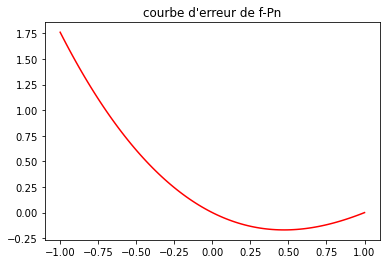

In [29]:
y4=[y3[i]-pn[i] for i in range(len(y3))]
plt.plot(t,y4,'r')
plt.title("courbe d'erreur de f-Pn")
plt.show()

=>La courbe représente 𝑙′𝑒𝑟𝑟𝑒𝑢 𝑟𝑑′𝑖𝑛𝑡𝑒𝑟𝑝𝑜𝑙𝑎𝑡𝑖𝑜𝑛 de Lagrange lors de l'approximation d'une fonction f, c'est-à-dire : lorsque yi = f(xi)

**Conclusion**

les avantages de l'interpolation de Lagrange:
<il>Interpolation naturelle des points de controle.</il>

-Equation relativement simple.

-Reconstruction lisse de données parfaites.

les inconvénients de l'interpolation de Lagrange:
Support global des fonctions de base 
=> influence globale des points de controle sur la courbe.

-Le degré est lié au nombre de points de controle
Difficulté de controle des conditions aux limites
Forte tendance à osciller sur des données bruitées

### Exercice 2:

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$, en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

Text(0.5, 1.0, 'Interpolation Equidistante avec N=10')

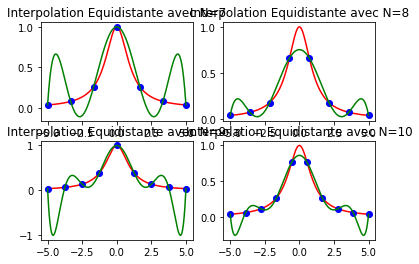

In [30]:
import matplotlib.pyplot as plt
from numpy import linspace
import numpy as np
N=7
X=linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")
#####################################################
N=8
X=linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")
#######################################################
N=9
X=linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X);
p=np.polyfit(X,Y,N-1)
t=linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")
#######################################################
N=10
X=linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X);
p=np.polyfit(X,Y,N-1)
t=linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")

cette phénoméne d'oscillation apparait et s'amplifie lorsque n augmente. Ce phénoméne a été clairement mis en évidence et expliqué par Carl Runge en 1901.

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :$$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev est meilleure qu'une interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [31]:
import math
import numpy as np
def tcheb (a,b,n):
  V=[]
  for k in range (1,n):
    V.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
  return V

In [32]:
tcheb(-5,5,11)


[-5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

/srv/conda/envs/notebook/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/srv/conda/envs/notebook/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/srv/conda/envs/notebook/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Equidistante avec N=17')

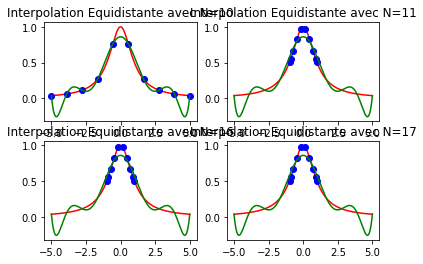

In [34]:
import matplotlib.pyplot as plt
from numpy import linspace
import numpy as np
N=10
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*10+[1])).roots()
f= lambda x: 1/(1 + x**2)
Yt=f(Xt)
pt=np.polyfit(Xt,Yt,N-1)

plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")
#####################################################
N=11
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*10+[1])).roots()
f=lambda x: 1/(1+ x**2)
Yt=f(Xt)
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=11")
#######################################################
N=16
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*10+[1])).roots()
f=lambda x: 1/(1+x**2)
Yt=f(Xt);
pt=np.polyfit(Xt,Yt,N-1)
t=linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=16")
#######################################################
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*10+[1])).roots()
f=lambda x: 1/(1+x**2)
Yt=f(Xt);
pt=np.polyfit(Xt,Yt,N-1)
t=linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=17")

On remarque que lorsque N augmente, plus nous arrivons à la fonction F est égal à Pt.

une façon d’ameliorer la qualité du résultat est de choisir les points d’interpolation de Tchebycheff.

### Conclusion

Le phénoméne **de Runge** peut-étre considérablement atténué en choisissant judicieusement les points d’évaluation. En particulier, on peut démontrer qu’en choisissant les racines des polynomes de Chebyshev (Tchebychev) comme points d’évaluation, on minimise les écarts entre la fonction interpolée et le polynome d’interpolation.

## Exercice 3:

## Interpolation de Newton:

### Définition:

L'interpolation newtonienne est une approximation polynomiale permettant d'obtenir le polynôme de Lagrange comme équation de la courbe en connaissant ses points.

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :

In [40]:
def intN(x,y):
    m=len(x)
    
    np.copy(y)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m] = np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle [-1;5]

In [41]:
x=[-1,0,2,5]
y=[6,1,3,66]
print(intN(x,y))

[ 0.         -5.          0.66666667 10.5       ]


In [42]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [44]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
f=intNval(x,y,t)
print(f)

[   7. -118.   27.  838.]


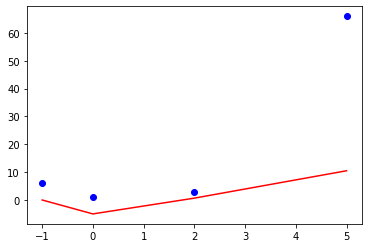

In [45]:
f=intN(x,y);
plt.plot(x,f,'r',x,y,'ob')
plt.show()

3) Calculer **P(1)** en utilisant le polynôme trouvé en 1.

In [46]:
p=intNval(x,y,t);
print(p[0])

7.0


Les différences divisées interviennent dans la formulation du théorème d'interpolation **de Newton**, qui donne une expression particulière du polynôme d'interpolation de Lagrange, permettant par exemple de démontrer que toute fonction polynomiale est égale à sa série de Newton.

### Conclusion génerale: 

L'interpolation polynomiale:

-évaluer la fonction en un point : **Polynôme de Lagrange**
    
    
 
-compiler la fonction : **Polynôme de Newton**
